Homework 2 for machine learning with python <br>
Data source:https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw <br>
<br>
1.Chosen dataset: toyota.csv 


In [355]:
#Import required Libraries 
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

2. A) Data loading

In [356]:
#Changing working directory
os.chdir(r'H:\EMK_Data analysis with python')

#Read 'csv' file
df = pd.read_csv('toyota.csv',encoding = 'unicode_escape')

display(df.head(10)) 
print(df.shape)
print(df.info())
print(df.columns)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
5,GT86,2017,15998,Manual,26919,Petrol,36.2,2.0
6,GT86,2017,18522,Manual,10456,Petrol,36.2,2.0
7,GT86,2017,18995,Manual,12340,Petrol,36.2,2.0
8,GT86,2020,27998,Manual,516,Petrol,33.2,2.0
9,GT86,2016,13990,Manual,37999,Petrol,36.2,2.0


(6738, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB
None
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


Here, Observation number= 6738, Column/Features number= 8 <br>
Out of 8 features 3 are categorical and rest 5 are numerical. For analysis of categorical data we need to done one-hot encoding or label encoding.

In [357]:
#Unique value in 'model' column
df['model'].unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [358]:
#Unique value in 'transmission' column
df['transmission'].unique()


array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [359]:
#Unique value in 'fuelType' column
df['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

(B) Perform Label Encoding or One-hot Encoding (Explain which one is best suitable for your analysis)

In [360]:
#One-hot encoding
#In One-hot encoding, for each categorical column,new column will be created which is equal to number of unique value in each categorical column.

df = pd.get_dummies(df, drop_first=True)
print(df.shape)
display(df.head())

(6738, 28)


,year,price,mileage,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2017,15995,18615,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2015,13998,27469,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2017,18998,14736,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2017,17498,36284,36.2,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [361]:
#LE = LabelEncoder()

#df['transmission'] = LE.fit_transform(df['transmission'])
#df['fuelType'] = LE.fit_transform(df['fuelType'])
#df['model'] = LE.fit_transform(df['model'])
#df['year'] = LE.fit_transform(df['year'])

#display(df.head(10))

For label encoder <br>
mean absolute error =  2140.937894996901 <br>
mean absolute percentage error =  0.2021319161489699 <br>
mean squared error =  912516.465129206 <br>
root mean squared error =  3020.7883846984723 <br>
coefficient of determination =  0.785574183923391 <br>
<br>
<br>
For One_hot encoder <br>
mean absolute error =  1139.5837471862478 <br>
mean absolute percentage error =  0.11095406441454814 <br>
mean squared error =  317037.526647772 <br>
root mean squared error =  1780.5553983652887 <br>
coefficient of determination =  0.9255015139708239 <br>

For mean absolute error,mean absolute percentage error,mean squared error and root mean squared error smaller value and for coeffient of determination, higher value indicate better accuracy of the model. <br>
So, one_hot encoding is better for this dataset analysis than label encoding.




In [362]:
#Separating the features and target variable

target = ['price']

X = df.drop('price', axis=1)
y = df[target]
print(X.shape, y.shape)

(6738, 27) (6738, 1)


(C) Split the original dataset into the train set (80%) and the test set (20%), 

In [363]:
#Creating train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5390, 27) (1348, 27) (5390, 1) (1348, 1)


(D) Perform Linear Regression and Predict the 'Price' from the test set, 

In [364]:
#Training with Linear Regression
model = LinearRegression()
model = model.fit(X_train, y_train)

#Prediction of price
y_pred = model.predict(X_test)

(E) Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients)

In [365]:
#Linear Regression Coefficients and intercept

coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

model.intercept_

,features,coefficients
5,model_ Aygo,-2891.244412
20,model_ Yaris,-1650.043831
21,transmission_Manual,-1067.353769
17,model_ Urban Cruiser,-270.522145
11,model_ IQ,-111.955489
2,mpg,-4.626972
1,mileage,-0.061030
19,model_ Verso-S,138.379859
23,transmission_Semi-Auto,275.051147
0,year,766.989172


array([-1538333.89239066])

y_intercept value = -1538333.89239066 <br>

###Interpretation of coefficient value <br>
Positive sign indicate that one unite change in feature variable , increase the value of target (price) variable, <br>
Negetive sign indicate that one unite change in feature variable, decrease the value of the target(price) variable

(F) Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.

In [366]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

#mean absolute percentage error
MAPE = mean_absolute_percentage_error(y_test,y_pred)
print("mean absolute percentage error = ", MAPE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1139.5837471862478
mean absolute percentage error =  0.11095406441454814
mean squared error =  3170377.526647772
root mean squared error =  1780.5553983652887
coefficient of determination =  0.9255015139708239


(G) Compare the actual and predicted target variable through visualization

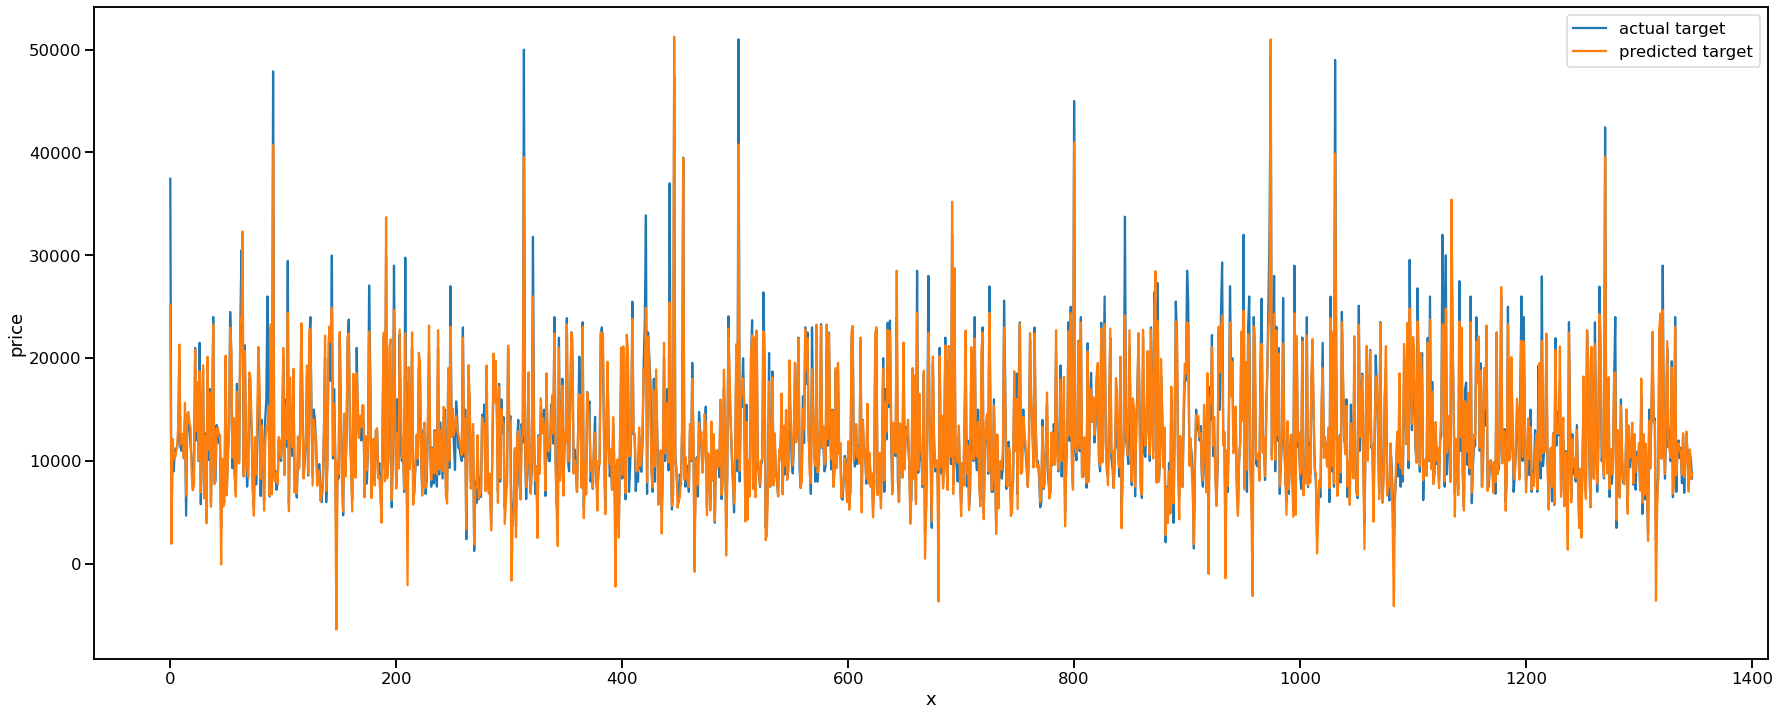

In [367]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

From this graph we can concluded that, pridicated value is lower than actual value. And some predicated value is negetive which is impossible as price can not be negetive. <br> So, This method is not feasible for this data set. We can use other methods for analysis of this data set.

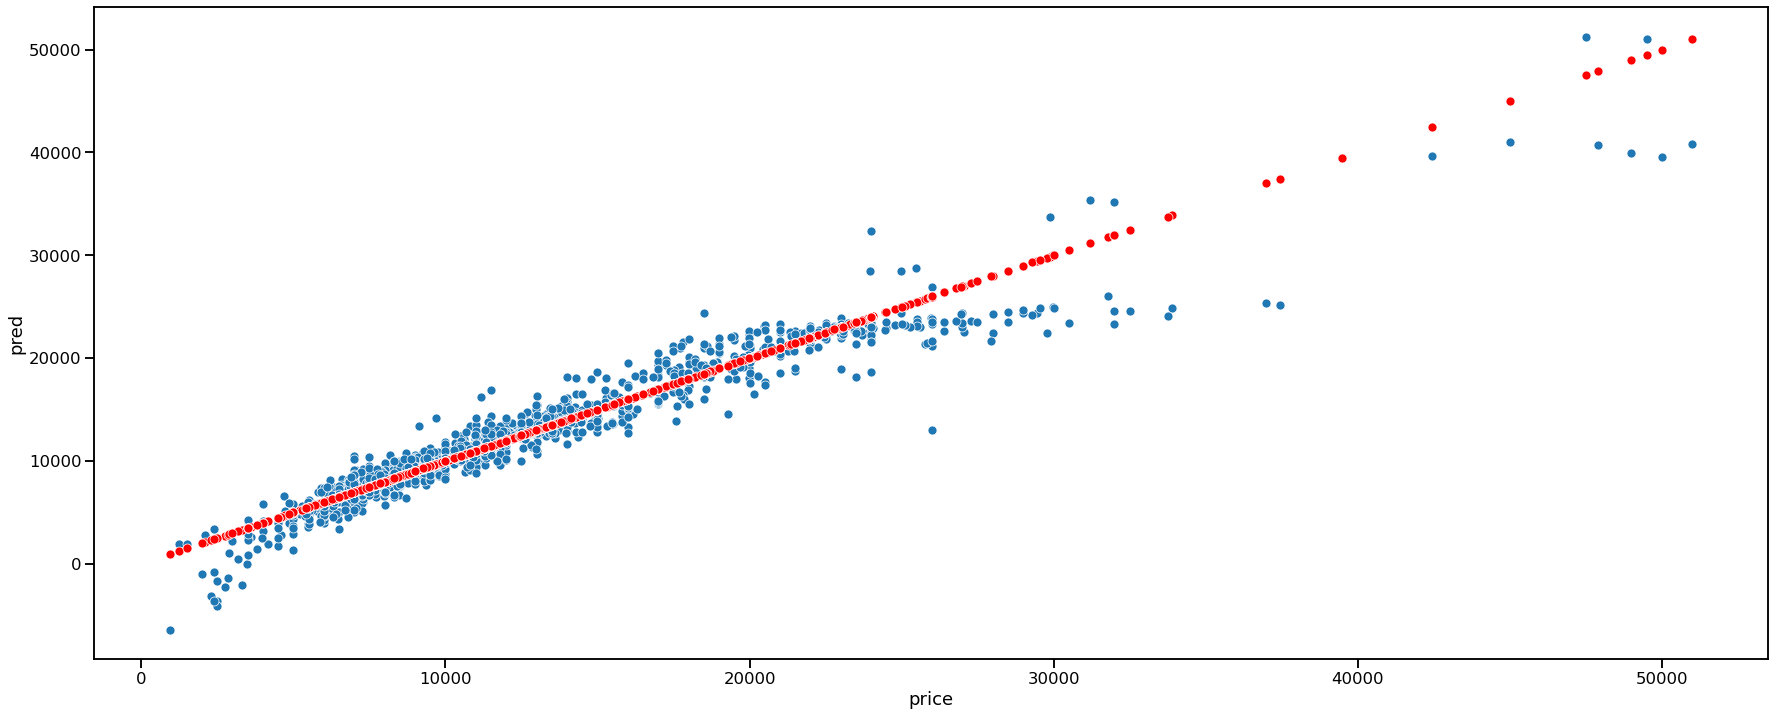

In [368]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()